In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [3]:
from pandas import DataFrame 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.font_manager import FontProperties 

font = FontProperties(fname="/home/gezi/soft/simsunttc/msyh.ttf", size=12)  #size可不用指定

In [4]:
from IPython.display import Image

In [5]:
import gezi
from libgezi import utf82gbk, gbk2utf8

In [6]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS
 
flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/lijiaoshou/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic.30neg.constrative/', '')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/bow.bak/epoch/model.cpkt-10-12750', '')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model.v0/bow.basic/', '')

#flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/keyword/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/keyword/model/rnn.lijiaoshou2/', '')

flags.DEFINE_string('seg_method_', 'basic', '')
flags.DEFINE_bool('feed_single_', True, '')

import gezi
import melt 
from deepiu.util import text2ids

import numpy as np

text2ids.init(FLAGS.vocab)

predictor = melt.Predictor(FLAGS.model_dir)

def predict(text, text2=None, topn=0):
  text = utf82gbk(text)
  timer = gezi.Timer()
  text_ids = text2ids.text2ids(text, FLAGS.seg_method_, feed_single=FLAGS.feed_single_, max_words=50)
  #print('text_ids', text_ids)
  
  if topn:
    #print(tf.get_default_graph().get_all_collection_keys())
    vocab = text2ids.vocab
    scores = predictor.inference('text_words_score', feed_dict = {'bow/main/text:0': [text_ids]})
    #print(scores)
    scores = scores[0]
    indexes = (-scores).argsort()[:topn]
    print(' '.join(['%s:%.6f'%(gbk2utf8(vocab.key(index)), scores[index]) for index in indexes]))
    return
    
  if text2 is not None:
    text2 = utf82gbk(text2)
    text2_ids = text2ids.text2ids(text2, FLAGS.seg_method_, feed_single=True)
    score = predictor.inference(['textsim'], 
                                    feed_dict= {
                                      'bow/main/text:0': [text_ids],
                                      'bow/main/text2:0': [text2_ids]
                                      })
    print(score[0][0])
    return score[0][0]

  #print('words', words)
  argmax_encode = predictor.inference(['words_importance'], 
                                    feed_dict= {
                                      'bow/main/text:0': [text_ids]
                                      })
  print('argmax_encode', argmax_encode[0])

  argmax_encode = argmax_encode[0][0]
  argmax_encode = [max(x, 0) for x in argmax_encode]

  text_ids =  text2ids.text2ids(text, FLAGS.seg_method_, feed_single=FLAGS.feed_single_, append_start=False, append_end=False)
  words = text2ids.ids2words(text_ids)
    
  words = [gbk2utf8(x) for x in words]

  seq_len = 0
  for x in words:
  	if x != 0:
  		seq_len += 1
  	else:
  		break

  print(text_ids)

   # visualize model
  import matplotlib.pyplot as plt
  #argmaxs = [np.sum((argmax_encode==k)) for k in range(seq_len)]
  argmaxs = argmax_encode[:seq_len]
  print('argmaxs', argmaxs, np.sum(argmaxs), seq_len)
  x = range(len(argmaxs))
  total = sum([x for x in argmaxs if x > 0])
  y = [100.0*n/total for n in argmaxs]
  #print(words, y)
  print(gbk2utf8(text))
  
  #for word, score in zip(words, y):
  #  print(word, score)
  
  fig = plt.figure()
  
  #words = [x.decode('utf8') for x in words]
  #words = [i for i in range(len(words))]

  #plt.xticks(x, words, rotation=45)
  #plt.bar(x, y)
  #plt.ylabel('%')
  #plt.title('Visualisation of words importance')

  df = DataFrame({"%":y}, index=words) 
  ax = df.plot(kind = 'bar', rot = 90) 
  labels = [label.decode("utf-8") for label in df.index.values] 
  ax.set_xticklabels(labels, fontproperties=font) 
    
  #zhfont1 = matplotlib.font_manager.FontProperties(fname='/home/gezi/soft/simsunttc/msyh.ttf')
  #plt.xlabel('性别',fontproperties=zhfont1)
  #plt.ylabel('人数',fontproperties=zhfont1)
  #plt.xticks( (0,1),('男','女') ,fontproperties=zhfont1)
  #plt.bar(left=(0,1), height=(1,0.5), width=0.35)
  
  plt.title('Visualisation of words importance')
  #plt.title('句子词汇重要度')
  plt.show()

tensorflow_version: 1.2.0-rc0
ENCODE_UNK 1
restore from /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic.30neg.constrative/model.ckpt-0.8-1000


INFO:tensorflow:Restoring parameters from /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic.30neg.constrative/model.ckpt-0.8-1000


import graph ok /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic.30neg.constrative/model.ckpt-0.8-1000.meta
restore ok /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic.30neg.constrative/model.ckpt-0.8-1000


In [7]:
def top_words(text, topn=100):
  return predict(text, topn=topn)

In [8]:
top_words('高铁')
top_words('美女')

高:0.770104 铁:0.585801 它:0.479788 电话:0.446850 防:0.431093 工业:0.421348 机:0.410940 线:0.409376 器:0.401725 支付:0.397738 系统:0.395382 亿:0.386478 方:0.385348 用:0.384791 认准:0.380075 拥有:0.379076 处理:0.376550 使用:0.374629 焊机:0.372752 仪:0.371943 伸缩:0.371333 打底:0.370018 ——:0.369840 通:0.365877 鸡苗:0.362750 机床:0.361035 化:0.358543 建:0.358528 百:0.357358 振:0.355965 生产:0.354409 易:0.354324 功能:0.353144 垃圾:0.352608 井:0.351910 件:0.351377 安全:0.349577 科技:0.349163 排水:0.348441 基业:0.348109 驹:0.347826 管材:0.346169 扎:0.345532 桶:0.344555 同行:0.344254 新品:0.343561 管道:0.342681 科:0.341283 橡胶:0.340207 宁真:0.340125 手机:0.340060 焊接:0.339140 德阳:0.339008 销售:0.338043 终端:0.337569 耐用:0.337532 昆山:0.337019 解决:0.336068 条:0.336064 衬衫:0.335881 交易:0.335805 这款:0.335536 数控:0.335263 设备:0.335177 陕西:0.335056 高温:0.334670 流:0.334293 性能:0.333818 质量:0.333155 锅炉:0.332835 疯:0.332458 桩:0.332100 色:0.332050 屹立:0.331740 计:0.331214 声:0.330896 顶:0.330650 快:0.330534 清理:0.329921 必看:0.328606 明通:0.327967 铣刀:0.327879 ):0.327543 铣床:0.327455 先进:0.327178 优质:0.326680 金

In [9]:
top_words('墨镜')

墨镜:1.000000 金茂:0.445100 水疗:0.427629 过冬:0.425225 找准:0.424368 秩序:0.420087 撩人:0.418351 压路:0.417193 青草:0.416743 薰衣草:0.416478 求学:0.416237 焕发:0.414040 臻品:0.409819 猩红:0.408939 国安:0.408769 含油:0.407965 景区:0.405976 正祥:0.405543 鼻子:0.405504 癌症:0.405182 天安:0.404813 托付:0.404500 示:0.404129 纹绣:0.402958 华悦:0.402821 群发:0.402187 茶杯:0.402146 布阵:0.401415 汀:0.401277 留神:0.401166 俱:0.400455 甲基:0.400375 跟踪:0.400304 减压:0.399952 窥探:0.398632 浏览:0.398590 裙裤:0.398355 富辰:0.397270 b:0.396990 纱窗:0.396777 贝儿:0.396742 场所:0.396631 矶:0.396244 国学:0.396217 打桩:0.396045 乃:0.395335 发财:0.395331 以其:0.394997 射线:0.394490 力强:0.394410 古代:0.394322 胡歌:0.394138 一平:0.393922 省内:0.393289 福尚:0.392156 signature:0.391969 杆:0.391668 眼界:0.390366 双肩:0.390216 宇翔:0.390198 资信:0.389847 轴线:0.389652 肌:0.388988 sor:0.388976 960:0.388385 读本:0.387881 贝特:0.387387 健:0.387285 系带:0.387244 其次:0.387195 口红:0.387175 qq:0.387128 献宝:0.386917 退回:0.386569 意向:0.386554 藕:0.385404 688:0.385213 罗杰斯:0.385191 方管:0.385014 靓车:0.384918 溜:0.384706 三段:0.384610 强度:0.383947 see

In [10]:
predict('美女', '美女')
predict('帅哥戴墨镜', '帅哥')
predict('帅哥戴墨镜', '墨镜')

[ 1.00000024]
[ 0.56094158]
[ 0.54337764]


array([ 0.54337764], dtype=float32)

argmax_encode [[ 1.00000012  0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.        ]]
[1311, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [1.0000001] 1.0 1
美女


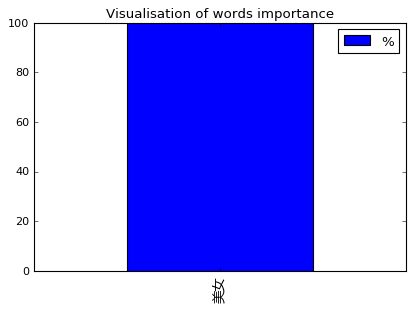

argmax_encode [[ 0.56094158  0.76593673  0.54337764  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.        ]]
[6829, 1355, 12429, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.56094158, 0.76593673, 0.54337764] 1.87026 3
帅哥戴墨镜


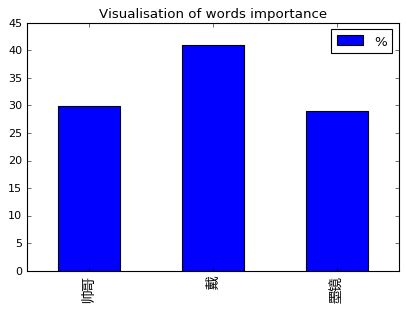

argmax_encode [[ 0.31026757  0.46320003  0.47958454  0.40621465  0.1238317   0.35998201
   0.59398222  0.37092543  0.41151655  0.59398222  0.34396556  0.18166816
   0.59398222  0.26742718  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[3935, 640, 5, 80, 1321, 508, 3, 34, 269, 3, 2239, 25, 3, 1407, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.31026757, 0.46320003, 0.47958454, 0.40621465, 0.1238317, 0.35998201, 0.59398222, 0.37092543, 0.41151655, 0.59398222, 0.34396556, 0.18166816, 0.59398222, 0.26742718] 5.50053 14
初中孩子的免费精品课，用手机，在家上，省心


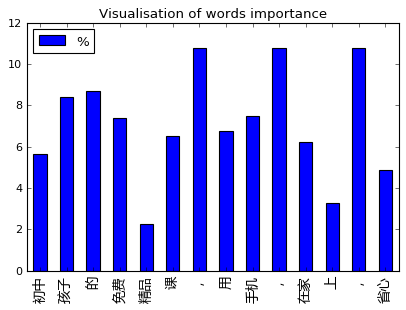

argmax_encode [[ 0.22079191  0.46691686  0.44973353  0.40177798  0.44000694  0.35864305
   0.18924674  0.23608734  0.34599203  0.15097082  0.508057    0.17450273
   0.4182727   0.35864305  0.28836119  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[17, 34, 1393, 324, 29, 199, 41, 7663, 3, 993, 269, 712, 56, 199, 1362, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.22079191, 0.46691686, 0.44973353, 0.40177798, 0.44000694, 0.35864305, 0.18924674, 0.23608734, 0.34599203, 0.15097082, 0.508057, 0.17450273, 0.4182727, 0.35864305, 0.28836119] 5.008 15
好用颜值高才是王道，这些手机现在买才实惠


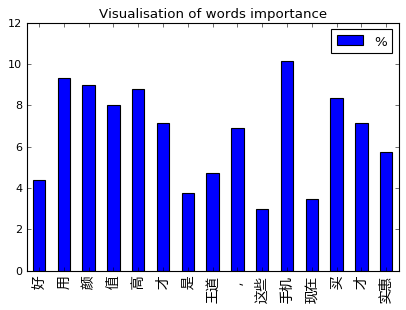

In [11]:
predict('美女')
predict('帅哥戴墨镜')
predict('初中孩子的免费精品课，用手机，在家上，省心')
predict('好用颜值高才是王道，这些手机现在买才实惠')

argmax_encode [[ 0.20841724  0.72098154  0.67106259  0.52916056  0.31342179  0.19287419
   0.20182016  0.33993861  0.59572273  0.5775423   0.29789713  0.66768789
   0.27262825  0.11307454  0.13336165  0.46697068  0.77256703  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[243, 350, 116, 1598, 135, 1401, 6, 18, 1208, 200, 878, 402, 365, 43, 579, 46, 428, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.20841724, 0.72098154, 0.67106259, 0.52916056, 0.31342179, 0.19287419, 0.20182016, 0.33993861, 0.59572273, 0.5775423, 0.29789713, 0.66768789, 0.27262825, 0.11307454, 0.13336165, 0.46697068, 0.77256703] 7.07513 17
比信

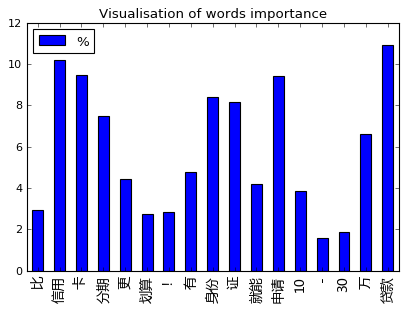

argmax_encode [[ 0.31754982  0.33976409  0.2194804   0.24853739  0.10727432  0.38028359
   0.38217577  0.2399717   0.28467101  0.51701909  0.39867836  0.27353546
   0.06853651  0.3062377   0.25599015  0.34824693  0.28222373  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[4, 16, 4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.31754982, 0.33976409, 0.2194804, 0.24853739, 0.10727432, 0.38028359, 0.38217577, 0.2399717, 0.28467101, 0.51701909, 0.39867836, 0.27353546, 0.068536505, 0.3062377, 0.25599015, 0.34824693, 0.28222373] 4.97018 17
1890元往返飞旧

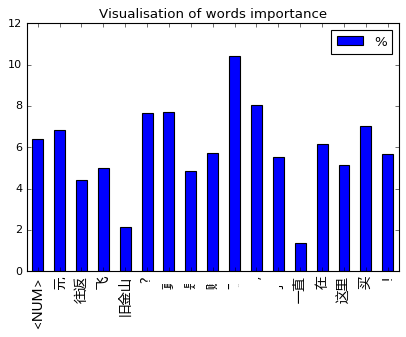

argmax_encode [[ 0.40027308  0.40524396  0.34998772  0.43610767  0.53519559  0.3476401
   0.59478444  0.52460968  0.29897726  0.17867559  0.42510575  0.26759362
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[14, 199, 41, 976, 620, 100, 844, 5, 3709, 4480, 2260, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.40027308, 0.40524396, 0.34998772, 0.43610767, 0.53519559, 0.3476401, 0.59478444, 0.52460968, 0.29897726, 0.17867559, 0.42510575, 0.26759362] 4.76419 12
这才是上班族修本科的正确打开方式！


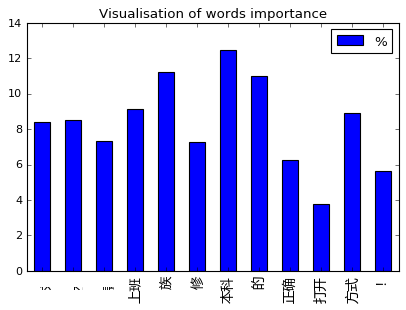

In [12]:
predict('比信用卡分期更划算！有身份证就能申请10-30万贷款')
predict('1890元往返飞旧金山?真是赚了,我一直在这里买!')
predict('这才是上班族修本科的正确打开方式！')

argmax_encode [[ 0.0972005   0.44433498  0.42326897  0.24415763  0.23368908  0.67855346
   0.65659374  0.09514511  0.32028127  0.27279723  0.4644165   0.33736837
   0.44441754  0.17872062  0.17015584  0.32107958  0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[19589, 36, 737, 8, 74, 626, 852, 245, 7, 993, 5404, 340, 12, 9771, 12322, 6140, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.097200498, 0.44433498, 0.42326897, 0.24415763, 0.23368908, 0.67855346, 0.65659374, 0.095145106, 0.32028127, 0.27279723, 0.4644165, 0.33736837, 0.44441754, 0.17872062, 0.17015584, 0.32107958] 5.38218 16
国庆到成都不要住酒店啦,

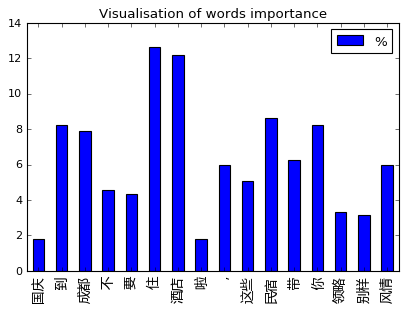

argmax_encode [[ 0.25021327  0.53013498  0.57137436  0.383479    0.25194478  0.18315393
   0.25021327  0.52713323  0.58094215  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[8145, 39, 269, 133, 8, 256, 8145, 33, 478, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.25021327, 0.53013498, 0.57137436, 0.383479, 0.25194478, 0.18315393, 0.25021327, 0.52713323, 0.58094215] 3.52859 9
低头玩手机?不如低头学英语


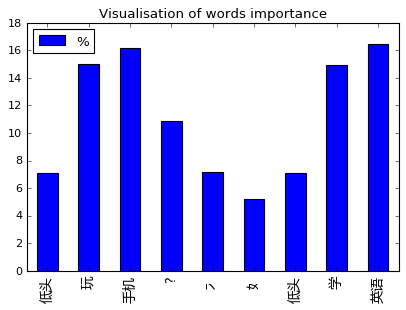

argmax_encode [[ 0.13447121  0.52228826  0.39763653  0.31960198  0.17926094  0.1724892
   0.24985373  0.15509284  0.25472596  0.28729916  0.15085372  0.33124822
   0.52228826  0.21962807  0.32750371  0.27980036  0.25276986  0.30091989
   0.28735992  0.15044469  0.06212515  0.16550732  0.28729916  0.37442026
   0.20258272  0.25422522  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]]
[6829, 6, 1277, 2671, 15, 59, 341, 2532, 87, 18, 400, 529, 6, 49, 378, 78, 58, 172, 21, 3697, 5718, 542, 18, 1262, 2511, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.13447121, 0.52228826, 0.39763653, 0.31960198, 0.17926094, 0.1724892, 0.24985373, 0.15509284, 0.25472596, 0.28729916, 0.15085372, 0.33124822, 0.52228826, 0.21962807, 0.32750371, 0.279800

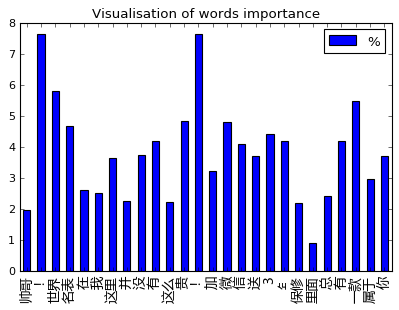

argmax_encode [[ 0.46178222  0.71408361  0.16559964  0.45220447  0.16559964  0.83949226
   0.4002195   0.29825056  0.64339566  0.27767229  0.31051001  0.76867175
   0.12715647  0.46014354  0.25884241  0.83949226  0.3416602   0.14748777
   0.28628051  0.52599728  0.64339566  0.22742517  0.39479151  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[2520, 1741, 11, 218, 11, 478, 2583, 885, 508, 7, 136, 640, 3755, 279, 25, 478, 20, 4884, 16, 1777, 508, 80, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.46178222, 0.71408361, 0.16559964, 0.45220447, 0.16559964, 0.83949226, 0.4002195, 0.29825056, 0.64339566, 0.27767229, 0.31051001, 0.76867175, 0.12715647, 0.46014354, 0.25884241, 0.83949226, 0.341

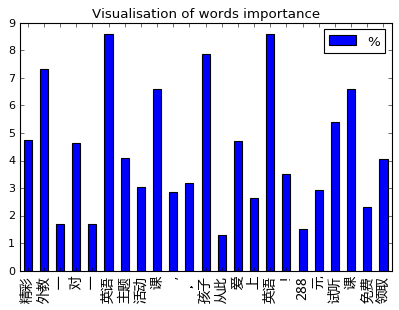

In [13]:
predict('国庆到成都不要住酒店啦,这些民宿带你领略别样风情')
predict('低头玩手机?不如低头学英语')
predict('帅哥！世界名表在我这里并没有这么贵！加微信送3年保修里面总有一款属于你')
predict('精彩外教一对一英语主题活动课,让孩子从此爱上英语!288元试听课免费领取')

argmax_encode [[ 0.48143125  0.16355737  0.70488906  0.1798594  -0.00216089  0.33894795
   0.70488906  0.3964808   0.35912126  0.42719001  0.32110995  0.24795735
   0.29233724  0.25196159  0.17091513  0.22810957  0.2023346   0.30294478
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[2280, 4880, 33, 90, 1294, 133, 33, 2193, 328, 942, 7, 612, 36, 163, 27, 8, 978, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.48143125, 0.16355737, 0.70488906, 0.1798594, 0, 0.33894795, 0.70488906, 0.3964808, 0.35912126, 0.42719001, 0.32110995, 0.24795735, 0.29233724, 0.25196159, 0.17091513, 0.22810957, 0.2023346, 0.30294478] 5.77403

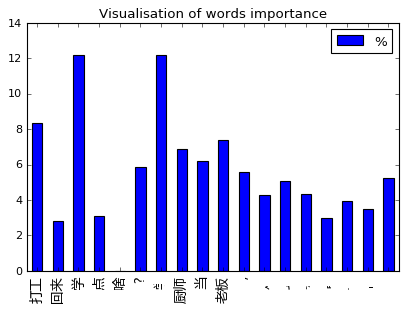

argmax_encode [[ 0.34550869  0.7773692   0.32351029  0.12499611  0.43940124  0.46697599
   0.32351029  0.44835985  0.60575581  0.65896082  0.26744181  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.34550869, 0.7773692, 0.32351029, 0.12499611, 0.43940124, 0.46697599, 0.32351029, 0.44835985, 0.60575581, 0.65896082, 0.26744181] 4.78179 11
水饺加盟,无需厨师,总部扶持创业!


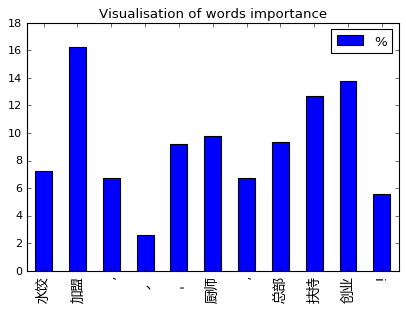

argmax_encode [[ 0.35747889  0.79735053  0.32600552  0.12458515  0.43849456  0.48225725
   0.32600552  0.46879411  0.63417822  0.65236664  0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.35747889, 0.79735053, 0.32600552, 0.12458515, 0.43849456, 0.48225725, 0.32600552, 0.46879411, 0.63417822, 0.65236664] 4.60752 10
水饺加盟,无需厨师,总部扶持创业


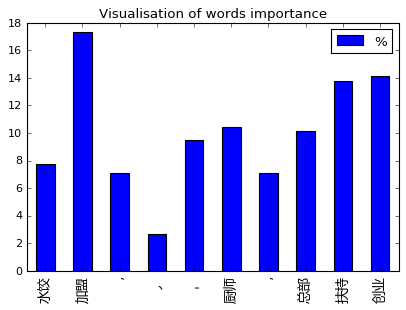

In [14]:
predict('打工回来学点啥?学厨师当老板,走到哪都不怕！')
predict('水饺加盟,无需厨师,总部扶持创业!')
predict('水饺加盟,无需厨师,总部扶持创业')

argmax_encode [[ 0.29414541  0.21623173  0.34143567  0.49846798  0.50090837  0.2043907
   0.21775194  0.38912097  0.39645901  0.22319183  0.19691581  0.43079633
   0.32840991  0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[1434, 4062, 1992, 303, 29, 695, 115, 52, 676, 38, 1386, 9, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.29414541, 0.21623173, 0.34143567, 0.49846798, 0.50090837, 0.2043907, 0.21775194, 0.38912097, 0.39645901, 0.22319183, 0.19691581, 0.43079633, 0.32840991] 4.23823 13
iPhone隐藏功能：高铁也能在线选座了！


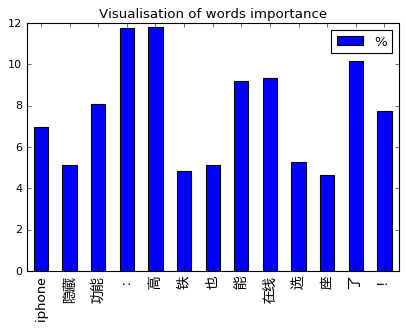

In [15]:
predict('iPhone隐藏功能：高铁也能在线选座了！')

In [16]:
predict('iPhone隐藏功能：高铁也能在线选座了！', 'iPhone')

[ 0.29414544]


array([ 0.29414544], dtype=float32)

In [17]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '高铁')

[ 0.5022161]


array([ 0.5022161], dtype=float32)

In [18]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '选座')

[ 0.25968379]


array([ 0.25968379], dtype=float32)

In [19]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '高铁选座')

[ 0.47690105]


array([ 0.47690105], dtype=float32)

argmax_encode [[ 0.12854846  0.25197926  0.25424939  0.3612994   0.23313826  0.59367305
   0.09643227  0.15153182  0.51674455  0.20033595  0.59367305  0.336813
   0.33392459  0.13857692  0.44636354  0.3612994   0.24687356  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[4447, 7542, 9634, 2835, 8124, 7, 9771, 3086, 5, 3612, 7, 136, 7808, 3254, 25, 2835, 5341, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.12854846, 0.25197926, 0.25424939, 0.3612994, 0.23313826, 0.59367305, 0.096432269, 0.15153182, 0.51674455, 0.20033595, 0.59367305, 0.336813, 0.33392459, 0.13857692, 0.44636354, 0.3612994, 0.24687356] 5.24546 17

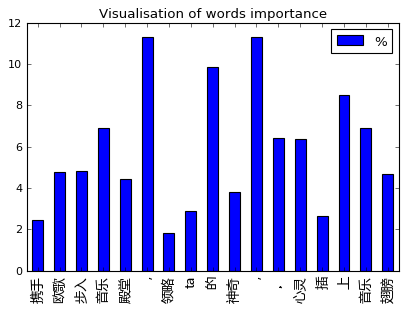

In [20]:
predict('携手欧歌步入音乐殿堂,领略ta的神奇,让心灵插上音乐翅膀')

argmax_encode [[ 0.20820126  0.53613693  0.19126597  0.28098458  0.48319989  0.611426
   0.23380044  0.37613386  0.35448641  0.37613386  0.53613693  0.611426    0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[8854, 2277, 583, 3581, 852, 197, 7, 11, 218, 11, 2277, 197, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.20820126, 0.53613693, 0.19126597, 0.28098458, 0.48319989, 0.611426, 0.23380044, 0.37613386, 0.35448641, 0.37613386, 0.53613693, 0.611426] 4.79933 12
巨人游泳五星级酒店培训,一对一游泳培训


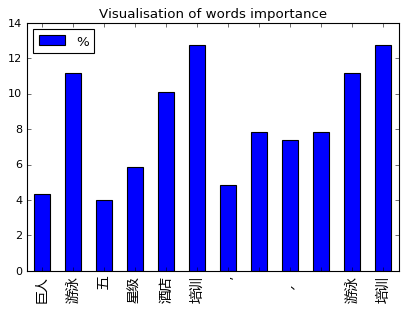

In [21]:
predict('巨人游泳五星级酒店培训,一对一游泳培训')

argmax_encode [[ 0.23155335  0.22988747  0.15513     0.40086401  0.38401285  0.30054301
   0.33202103  0.52247357  0.45039874  0.34698611  0.08643279  0.29569566
   0.28702027  0.31024602  0.33651987  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.23155335, 0.22988747, 0.15513, 0.40086401, 0.38401285, 0.30054301, 0.33202103, 0.52247357, 0.45039874, 0.34698611, 0.086432792, 0.29569566, 0.28702027, 0.31024602, 0.33651987] 4.66978 15
往返飞旧金山?真是赚了,我一直在这里买!


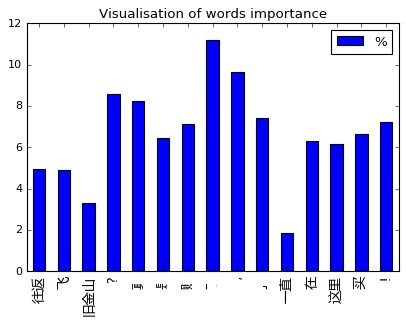

In [22]:
predict('往返飞旧金山?真是赚了,我一直在这里买!')

argmax_encode [[ 0.3493368   0.23967412  0.63685751  0.58884108  0.43831158  0.29256433
   0.36090603  0.48388898  0.40898445  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[8, 74, 626, 852, 3, 341, 5, 5404, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.3493368, 0.23967412, 0.63685751, 0.58884108, 0.43831158, 0.29256433, 0.36090603, 0.48388898, 0.40898445] 3.79936 9
不要住酒店，这里的民宿好


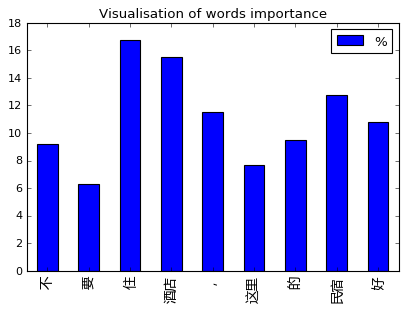

In [23]:
predict('不要住酒店，这里的民宿好')

argmax_encode [[ 0.34933665  0.23967409  0.63685751  0.48388892  0.43831167  0.29256427
   0.36090612  0.58884102  0.40898445  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[8, 74, 626, 5404, 3, 341, 5, 852, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.34933665, 0.23967409, 0.63685751, 0.48388892, 0.43831167, 0.29256427, 0.36090612, 0.58884102, 0.40898445] 3.79936 9
不要住民宿，这里的酒店好


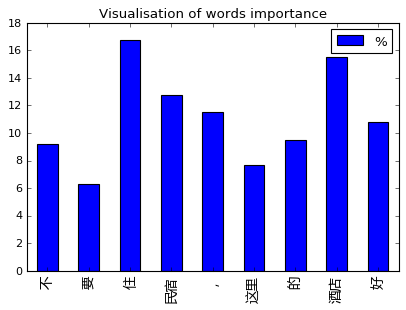

In [24]:
predict('不要住民宿，这里的酒店好')

argmax_encode [[ 0.2511313   0.24631226  0.16276252  0.28717941  0.11457482  0.71642375
   0.19008358  0.29015052  0.20994136  0.57450795  0.28426731  0.71642375
   0.16957742  0.19420606  0.28335792  0.08037302  0.11829662  0.57450795
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[247, 189, 4845, 2881, 12429, 3, 417, 52, 175, 9, 401, 3, 1072, 174, 23, 6114, 556, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.2511313, 0.24631226, 0.16276252, 0.28717941, 0.11457482, 0.71642375, 0.19008358, 0.29015052, 0.20994136, 0.57450795, 0.28426731, 0.71642375, 0.16957742, 0.19420606, 0.28335792, 0.080373019, 0.11829662, 0.57

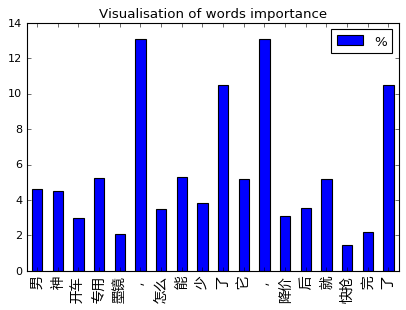

In [25]:
predict('男神开车专用墨镜，怎么能少了它，降价后就快抢完了')

argmax_encode [[ 0.28571257  0.77230632  0.18752138  0.19683579  0.22140929  0.22060061
   0.24325973  0.44377318  0.23802096  0.11216769  0.2950874   0.77230632
   0.16052119  0.30002654  0.32199031  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[59, 5, 22092, 5705, 3781, 914, 326, 7, 38, 1262, 1553, 5, 12429, 343, 1826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.28571257, 0.77230632, 0.18752138, 0.19683579, 0.22140929, 0.22060061, 0.24325973, 0.44377318, 0.23802096, 0.11216769, 0.2950874, 0.77230632, 0.16052119, 0.30002654, 0.32199031] 4.77154 15
我的家乡惠州越来越热,选一款喜欢的墨镜很重要


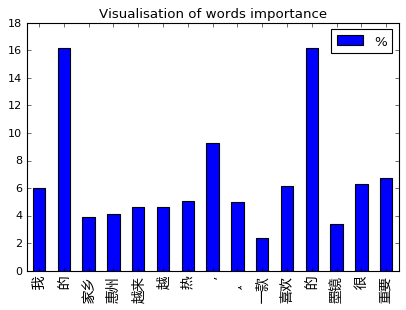

In [26]:
predict('我的家乡惠州越来越热,选一款喜欢的墨镜很重要')

In [27]:
predict('选一款喜欢的墨镜很重要,我的家乡惠州越来越热', '我的家乡惠州越来越热')

[ 0.77551425]


array([ 0.77551425], dtype=float32)

In [28]:
predict('选一款喜欢的墨镜很重要,我的家乡惠州越来越热', '选一款喜欢的墨镜很重要')

[ 0.80378366]


array([ 0.80378366], dtype=float32)

In [29]:
predict('我的家乡惠州越来越热,选一款喜欢的墨镜很重要', '选一款喜欢的墨镜很重要')

[ 0.8037836]


array([ 0.8037836], dtype=float32)

In [30]:
top_words('往返')

往返:1.000000 移民:0.602577 旅游:0.564679 留学:0.562971 澳洲:0.542226 湾:0.522625 国航:0.519807 名校:0.517615 典当:0.515514 去:0.495048 旅:0.494821 签证:0.493902 生:0.481907 游:0.481526 北:0.474818 欧美:0.473653 地产:0.473631 护照:0.472570 招生:0.465800 8000:0.464657 之:0.462294 讲座:0.461336 天河:0.457598 办理:0.457165 产权:0.454515 艺术:0.453916 读:0.448457 文化:0.446516 机票:0.446439 张家界:0.444728 丁酉:0.444131 大学:0.443467 园林:0.443154 祝:0.441101 幻想:0.439997 模型:0.439740 富力:0.439268 售楼:0.437429 新加坡:0.436109 欧洲:0.435908 城:0.435754 文武:0.435565 名画:0.435283 规划:0.435275 科学:0.433707 代办:0.433281 淡季:0.432307 挑灯:0.432012 ree:0.431776 语:0.431410 转盘:0.430347 下子:0.430052 补差:0.429316 温泉:0.428724 丈母娘:0.428300 就能:0.427597 肉食:0.427581 信息:0.426447 专享:0.426295 近:0.424974 紧抓:0.424390 壁柜:0.423469 景点:0.423196 ":0.422440 兵种:0.422399 加元:0.422050 包机:0.421764 线路:0.421214 首届:0.421125 景区:0.420999 咖:0.420707 自卑:0.420447 宅:0.420307 订:0.419855 唇:0.419152 鄄城:0.418504 产业:0.418192 可以:0.417749 创富:0.416786 柠檬:0.415935 2958:0.415817 作战:0.415800 苛:0.415760 航空:0.415636 爱情

In [31]:
top_words('民宿')

民宿:1.000000 小区:0.690942 房子:0.674752 环境:0.659033 城市:0.658238 公寓:0.636250 房价:0.627306 屋:0.620521 案例:0.618221 房屋:0.618043 楼盘:0.612317 房源:0.606229 居:0.605089 户型:0.604771 翻新:0.600487 别墅:0.599836 地毯:0.597364 豪宅:0.597049 这样:0.594641 房东:0.593107 美观:0.592733 套房:0.591658 拉门:0.591455 楼:0.589667 遮阳:0.586373 房:0.584688 施工:0.584562 窗帘:0.582328 木:0.579258 防腐:0.573761 理想:0.571301 图:0.570117 棚:0.567494 均价:0.567254 农民:0.566829 欧式:0.566656 呢:0.565754 新房:0.565140 搞:0.563030 固安:0.562519 房产:0.562284 出租:0.561074 租房:0.560191 聚会:0.559976 隔音:0.559083 树:0.556163 大有:0.555602 鑫:0.554377 特诺:0.553155 婚礼:0.551810 即将:0.550817 婚宴:0.550308 墙面:0.550108 住:0.550005 阳台:0.547979 古建:0.547038 漏水:0.545844 厂房:0.545829 天花:0.545560 庭院:0.545316 场地:0.545154 绿:0.544905 绿化:0.543420 精装:0.542850 高尔夫:0.540453 招租:0.540373 喜:0.540294 结构:0.539261 手艺:0.539247 沈阳:0.538957 温馨:0.538739 浦东:0.537091 铝:0.535524 园林:0.534794 楼梯:0.533816 工地:0.533748 相信:0.533588 困扰:0.532122 入住:0.531042 购房:0.530847 买房:0.529751 院:0.529427 out:0.528864 吊顶:0.528323 装出:0.5

In [32]:
top_words('酒店')

酒店:1.000000 精装:0.786983 墙面:0.783190 住:0.780932 装饰:0.764138 租房:0.761296 房源:0.759593 户型:0.758114 家装:0.751171 房子:0.750001 公寓:0.733818 装修:0.724084 墙:0.718748 入住:0.714507 新房:0.713011 房:0.712430 室内:0.711886 屋:0.709606 整装:0.707709 全包:0.707627 房东:0.688103 家具:0.687869 豪宅:0.685942 省钱:0.681912 饰:0.675076 墙布:0.674635 集成:0.674048 风格:0.669963 沙发:0.669926 买房:0.669922 装出:0.668172 间:0.661019 吊顶:0.660436 装潢:0.659706 地毯:0.644526 衣柜:0.637684 翻新:0.633383 急售:0.628388 家居:0.627401 实木:0.622920 居:0.620556 墙体:0.616875 窗帘:0.614351 家:0.605090 90:0.599511 客厅:0.598705 房价:0.598419 木门:0.597944 套房:0.597826 小区:0.594159 展柜:0.593920 样板:0.592931 院:0.591115 厅:0.590431 瓷砖:0.590224 地板:0.589902 背景:0.589132 温馨:0.589014 婚宴:0.588166 面积:0.586794 实景:0.586215 展会:0.585268 隔断:0.584865 喜:0.583476 花:0.580351 中式:0.577649 地段:0.576714 卧室:0.576089 家家:0.574912 搞:0.570855 房产:0.569252 拎包:0.565450 屏风:0.561981 毛坯:0.558121 厨房:0.555083 案例:0.554122 园:0.550238 别墅:0.549722 宾馆:0.548494 汗蒸:0.548150 城市:0.547697 图:0.547627 平:0.546646 环境:0.544900 墙板:0.544

In [33]:
top_words('旧金山')

旧金山:1.000000 缺口:0.447444 香猪:0.437311 境外:0.436558 壁柜:0.433067 破冰:0.432430 神马:0.431382 掌机:0.425539 平谷:0.425427 水嫩:0.424437 太太:0.424045 马坊:0.421880 管控:0.421028 香:0.418692 仙草:0.417698 合页:0.416532 柜员:0.416232 窝:0.413952 转盘:0.413927 汤浅:0.413196 黄色:0.412365 光辉:0.411554 腊:0.411442 exe:0.410947 蝇:0.409015 必得:0.407673 作战:0.407671 财:0.407379 云南:0.407320 石墨:0.407302 改建:0.406713 鞭炮:0.406628 国航:0.406248 煲:0.405980 诊所:0.405906 healthy:0.405631 优种:0.405503 信诺:0.405010 43600:0.403912 可待:0.403773 董:0.403764 曾:0.403579 包含:0.403413 zcmall:0.403362 三七:0.402864 私家:0.402473 水带:0.402298 做出:0.402281 高尚:0.402189 治疗:0.400754 雀舌:0.400484 相处:0.400290 跌:0.400172 主要:0.397908 pp:0.397397 肚皮:0.396838 职校:0.396792 剧场:0.396780 降耗:0.396660 rosh:0.396566 孔雀:0.396469 婚前:0.395862 铅:0.395858 倒闭:0.395517 向阳:0.395390 技艺:0.394468 sunny:0.394244 潼:0.393674 爱宠:0.393478 羊粪:0.393123 火机:0.392894 暂时:0.392737 清秀:0.392663 恶梦:0.392456 纯银:0.392341 力塔:0.392167 篦子:0.392067 冒:0.391795 甚:0.391770 人寿:0.391352 松软:0.390911 毕:0.390667 菜品:0.390411

In [34]:
top_words('我的家乡惠州越来越热,选一款喜欢的墨镜很重要')

的:0.772306 ,:0.443773 定制:0.358996 成:0.351616 棉:0.351198 了:0.350806 生产:0.342403 控:0.338147 这么:0.334695 音质:0.334153 线:0.331443 防:0.329081 减肥:0.327325 医疗:0.323731 重要:0.321990 app:0.321512 以为:0.320006 ，:0.319664 礼物:0.317645 logo:0.317489 厂家:0.315872 而:0.315079 垫:0.312818 东西:0.309890 像:0.308764 活:0.307641 库:0.306123 影响:0.303906 行李:0.302358 直销:0.302151 橡塑:0.301770 温室:0.301646 为什么:0.300706 时:0.300500 健康:0.300390 掉:0.300257 很:0.300027 胶:0.299757 防滑:0.298326 用:0.297256 约:0.297135 内裤:0.296594 品牌:0.296457 优质:0.296313 斯:0.296261 喜欢:0.295087 供应:0.294400 泡沫:0.291316 还在:0.291239 购物:0.291219 面料:0.290828 痘痘:0.289893 衣:0.289769 怎样:0.288172 大牌:0.287727 一:0.287008 瘦:0.286738 我:0.285713 橡胶:0.285523 刑事:0.285016 款式:0.284483 保障:0.284208 衬衫:0.284146 跑步:0.283250 452:0.282743 胶带:0.282496 白色:0.281929 品质:0.281779 复合:0.281358 别:0.281191 货:0.281181 检测:0.280977 眼:0.280855 邮:0.280401 咨询:0.280186 皮带:0.279704 婚戒:0.279670 硅胶:0.278576 身材:0.278212 邮件:0.277914 手镯:0.277690 美丽:0.277426 滑:0.276957 有效:0.276403 新生儿:0.276251 人才:0

In [35]:
top_words('眼镜')

眼镜:1.000000 镜片:0.647459 轻:0.556304 必备:0.552477 镜:0.551875 脱:0.546749 滑:0.524148 近视:0.514729 推广:0.504583 真诚:0.498242 防滑:0.495695 邮:0.495473 透气:0.491091 蚕丝:0.490159 穿出:0.487631 借钱:0.485517 app:0.478876 值:0.473432 专线:0.472952 视力:0.471527 改变:0.469894 logo:0.469451 有型:0.467886 翻译:0.466023 199:0.464535 西裤:0.464227 男士:0.463565 知识:0.461924 实体:0.460517 穿:0.460246 客服:0.459101 就业:0.458773 瘦:0.458359 镜架:0.456832 遇到:0.456820 圣像:0.456190 皮衣:0.455317 借:0.454741 裤:0.454573 周:0.454328 试穿:0.453249 年薪:0.446919 订单:0.446465 新品:0.446318 通话:0.446202 虚拟:0.445079 公积金:0.445073 脱毛:0.444534 分期:0.443264 首发:0.441977 真皮:0.441735 耳机:0.440487 在家:0.440256 账:0.439953 借款:0.439053 面料:0.438207 宽带:0.437914 公子:0.437752 智:0.437031 互联:0.436979 查询:0.436371 很:0.436354 裤子:0.435700 合伙:0.435107 醛:0.434752 赶紧:0.434597 款:0.434180 意外:0.433689 银行:0.433157 拥有:0.433055 查看:0.432760 扬子:0.432492 助:0.431970 花花:0.431445 高额:0.430633 方式:0.430549 黑卡:0.430175 衬衫:0.430100 甜美:0.429445 始于:0.428628 码:0.428207 营销:0.428137 80000:0.427563 身份:0.427285 月息